<a href="https://colab.research.google.com/github/yitinnnng/CNN_HW2/blob/main/CNN_HW2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np 
import keras 
from keras.models import Sequential
from keras.datasets import mnist
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.utils import np_utils   
from matplotlib import pyplot as plt
import pandas as pd
import tensorflow as tf
from google.colab import files
import io

In [3]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

# 確認 train_all.csv 是否已上載
!ls *.* -l

# use Pandas to read train_all.csv
import pandas as pd
df = pd.read_csv(io.BytesIO(uploaded['train_all.csv']))
print(df)

Saving train_all.csv to train_all (1).csv
User uploaded file "train_all.csv" with length 69921 bytes
-rw-r--r-- 1 root root 69921 Dec 24 13:54 'train_all (1).csv'
-rw-r--r-- 1 root root 69921 Dec 24 13:54  train_all.csv
     Unnamed: 0  Unnamed: 1  Unnamed: 2  ...  Unnamed: 10  Unnamed: 11  Unnamed: 12
0     -0.002390   -0.002091    0.001010  ...     0.001011     0.000984           -1
1     -0.002484   -0.002170    0.000752  ...     0.001013     0.000981           -1
2     -0.002752   -0.002469    0.000998  ...     0.001038     0.000988           -1
3     -0.002925   -0.002657    0.001240  ...     0.001069     0.001009            1
4     -0.003050   -0.002783    0.001476  ...     0.001051     0.001009            1
..          ...         ...         ...  ...          ...          ...          ...
475   -0.001887   -0.001211    0.000661  ...     0.001134     0.001385            1
476   -0.001840   -0.001211    0.000724  ...     0.001229     0.001433            1
477   -0.002028   -0.001

In [4]:
dataset = df.values
print(dataset)

[[-2.389937e-03 -2.091195e-03  1.009520e-03 ...  1.010757e-03
   9.836760e-04 -1.000000e+00]
 [-2.484277e-03 -2.169811e-03  7.523100e-04 ...  1.013102e-03
   9.806900e-04 -1.000000e+00]
 [-2.751572e-03 -2.468553e-03  9.983030e-04 ...  1.038154e-03
   9.883500e-04 -1.000000e+00]
 ...
 [-2.028302e-03 -1.430818e-03  1.218850e-04 ...  1.356135e-03
   1.481274e-03  1.000000e+00]
 [-1.761006e-03 -1.289308e-03  5.279710e-04 ...  1.439037e-03
   1.572327e-03  1.000000e+00]
 [-1.698113e-03 -1.352201e-03  3.171210e-04 ...  1.285156e-03
   1.545728e-03  1.000000e+00]]


In [5]:
X = dataset[:,0:12]
Y = dataset[:,12:13]
# from sklearn import preprocessing
# sc = preprocessing.StandardScaler()
# X = sc.fit_transform(X)
# print(X)
X -= np.mean(X, axis=0)
X /= np.std(X, axis=0)
print(X)
# from sklearn.preprocessing import StandardScaler
# sc = StandardScaler()
# X = sc.fit_transform(X)

from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()
Y = ohe.fit_transform(Y).toarray()
#This creates a binary column for each category and returns a sparse matrix or dense array

[[ 0.21458695  0.00801811  1.09461625 ... -0.86367769 -0.3053205
  -0.42676683]
 [ 0.1661761  -0.04275725  0.58791473 ... -0.86531765 -0.29243074
  -0.44068604]
 [ 0.02901291 -0.23570443  1.07251886 ... -0.86172124 -0.15472743
  -0.40497902]
 ...
 [ 0.40016099  0.4345329  -0.65401719 ...  1.10409399  1.59311855
   1.89278171]
 [ 0.5373247   0.52592934  0.14596879 ...  1.78208354  2.04880592
   2.31722443]
 [ 0.56959842  0.48530891 -0.26940392 ...  0.94709485  1.20296832
   2.19323344]]


In [6]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size = 0.1)
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(432, 12) (48, 12) (432, 2) (48, 2)


In [7]:
model = Sequential()
#Dense 代表是 fully connected
model.add(Dense(20, input_dim=12, activation='relu'))
#add weight initialization
#model.add(Dense(5, input_dim=12, activation='relu',kernel_initializer=initializers.RandomNormal(stddev=0.01), ))
model.add(Dense(2))

In [8]:
from keras import initializers
#op = keras.optimizers.SGD(learning_rate=0.000)
op = keras.optimizers.Adadelta(learning_rate=1)
#op = keras.optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.99, nesterov=True)
#op = keras.optimizers.SGD(momentum=0.99, nesterov=True)
model.compile(loss='binary_crossentropy', optimizer=op, metrics=['accuracy'])

In [9]:
history = model.fit(X_train, y_train, epochs=200, batch_size=48)


Epoch 1/200
9/9 [==============================] - 2s 3ms/step - loss: 4.6386 - accuracy: 0.5064
Epoch 2/200
9/9 [==============================] - 0s 2ms/step - loss: 4.3161 - accuracy: 0.5884
Epoch 3/200
9/9 [==============================] - 0s 2ms/step - loss: 3.8012 - accuracy: 0.6015
Epoch 4/200
9/9 [==============================] - 0s 2ms/step - loss: 3.5254 - accuracy: 0.6554
Epoch 5/200
9/9 [==============================] - 0s 2ms/step - loss: 3.4730 - accuracy: 0.6777
Epoch 6/200
9/9 [==============================] - 0s 2ms/step - loss: 2.8269 - accuracy: 0.7228
Epoch 7/200
9/9 [==============================] - 0s 2ms/step - loss: 2.6673 - accuracy: 0.7447
Epoch 8/200
9/9 [==============================] - 0s 2ms/step - loss: 2.4621 - accuracy: 0.7757
Epoch 9/200
9/9 [==============================] - 0s 2ms/step - loss: 2.3595 - accuracy: 0.7890
Epoch 10/200
9/9 [==============================] - 0s 2ms/step - loss: 2.1243 - accuracy: 0.8041
Epoch 11/200
9/9 [===========

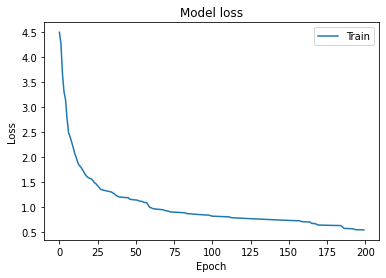

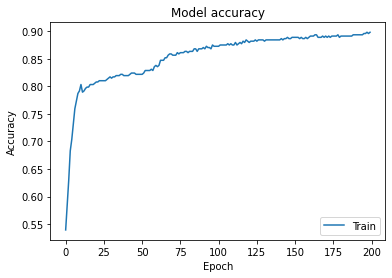

In [10]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()
plt.plot(history.history['accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

In [11]:
model.evaluate(X_test, y_test)[1]
#評估準確度 [1]=accuracy [0]=loss
#print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

2/2 [==============================] - 0s 5ms/step - loss: 0.7959 - accuracy: 0.8750


0.875